In [15]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [16]:
credentials = {}
credentials['name'] = 'keystone'
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['project_id'] = '1015f66724fe4232a5d6bf863d09b332'
credentials['region'] = 'dallas'
credentials['user_id'] = 'f7a4bb7561f844fbb33f0ffc87385ba0'
credentials['password'] = 'X,Gnp5rbkg.U9y9g'

In [17]:
set_hadoop_config(credentials)

In [18]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)
taxiFile = sc.textFile("swift://notebooks.keystone/SRS066327.fsa")
taxiFile.count()
taxiFile.take(5)

[u'>F988EW402IZTNZ_cs_nbp_rc cs_nbp=31-58 sample=89504129 rbarcode=TTATCGGC primer=V3-V5 subject=21739 body_site=stool center=WUGSC barcode_mismatch=0 primer_mismatch=0',
 u'CCTACGGGAGGCAGCAGGGATGAGATGG',
 u'>F988EW402HQUMD_cs_nbp_rc cs_nbp=31-573 sample=89504129 rbarcode=TTATCGGC primer=V3-V5 subject=21739 body_site=stool center=WUGSC barcode_mismatch=0 primer_mismatch=0',
 u'CCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTTAAATCGGGGACGAAAGGCCTTCTTGCGAACAGTTAGAAGGATTGACGGTACCGGAATAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATCAGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGGGATGGAAACTGCTGATCTAGAGTATCGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGACTTTCTGGACGAAAACTGACGCTGAGGCGCGAAAGCCAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTGGCCGTAAACGATGGGTACTAGGTGTAGGAGGTATCGACCCCTTCTGTGCCGGAGTTAACGCAATAAGTACCCCGCCTGGGGAGTACGACCGCAAGGTTGAA',
 u'>F988EW402GO7JY_cs_nbp_rc cs_nbp=31-554 sample=89504129 rbarcode=TTATCG

In [19]:

header_string="F988EW402IZTNZ_cs_nbp_rc cs_nbp=31-58 sample=89504129 rbarcode=TTATCGGC primer=V3-V5 subject=21739 body_site=stool center=WUGSC barcode_mismatch=0 primer_mismatch=0"

In [21]:
fields = [StructField(field_name, StringType(), True) for field_name in header_string.split(' ')]

In [28]:
print fields

[StructField(F988EW402IZTNZ_cs_nbp_rc,StringType,true), StructField(cs_nbp=31-58,StringType,true), StructField(sample=89504129,StringType,true), StructField(rbarcode=TTATCGGC,StringType,true), StructField(primer=V3-V5,StringType,true), StructField(subject=21739,StringType,true), StructField(body_site=stool,StringType,true), StructField(center=WUGSC,StringType,true), StructField(barcode_mismatch=0,StringType,true), StructField(primer_mismatch=0,StringType,true)]


In [35]:
data_temp = taxiFile.map(lambda k: k.split(" ")).map()

Let us now take a look at individual elements of this first list where the first entry starts at offset zero.

In [36]:
data_temp.collect()
 

[[u'>F988EW402IZTNZ_cs_nbp_rc',
  u'cs_nbp=31-58',
  u'sample=89504129',
  u'rbarcode=TTATCGGC',
  u'primer=V3-V5',
  u'subject=21739',
  u'body_site=stool',
  u'center=WUGSC',
  u'barcode_mismatch=0',
  u'primer_mismatch=0'],
 [u'CCTACGGGAGGCAGCAGGGATGAGATGG'],
 [u'>F988EW402HQUMD_cs_nbp_rc',
  u'cs_nbp=31-573',
  u'sample=89504129',
  u'rbarcode=TTATCGGC',
  u'primer=V3-V5',
  u'subject=21739',
  u'body_site=stool',
  u'center=WUGSC',
  u'barcode_mismatch=0',
  u'primer_mismatch=0'],
 [u'CCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTTAAATCGGGGACGAAAGGCCTTCTTGCGAACAGTTAGAAGGATTGACGGTACCGGAATAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATCAGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGGGATGGAAACTGCTGATCTAGAGTATCGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGACTTTCTGGACGAAAACTGACGCTGAGGCGCGAAAGCCAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTGGCCGTAAACGATGGGTACTAGGTGTAGGAGGTATCGACCCCTTCTGTGCCGGAGTTAACGCAA

We can also pull other elements by index.

In [46]:
schema = StructType(fields)
print schema


StructType(List(StructField(F988EW402IZTNZ_cs_nbp_rc,StringType,true),StructField(cs_nbp=31-58,StringType,true),StructField(sample=89504129,StringType,true),StructField(rbarcode=TTATCGGC,StringType,true),StructField(primer=V3-V5,StringType,true),StructField(subject=21739,StringType,true),StructField(body_site=stool,StringType,true),StructField(center=WUGSC,StringType,true),StructField(barcode_mismatch=0,StringType,true),StructField(primer_mismatch=0,StringType,true)))


## Explore Data
### Precipitation Data Values

Let's now reduce the dataset by selecting only rows with precipitation data values, those rows where the "METRIC" column equals "PRCP".

In [48]:
taxi_df = sqlContext.createDataFrame(data_temp.top(10), schema)

  

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 20.0 failed 10 times, most recent failure: Lost task 1.9 in stage 20.0 (TID 155, yp-spark-dal09-env5-0046): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 778, in func
    initial = next(iterator)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 1206, in topIterator
    yield heapq.nlargest(num, iterator, key=key)
  File "/usr/lib64/python2.7/heapq.py", line 459, in nlargest
    result = _nlargest(n, it)
  File "<ipython-input-41-e24b8946e687>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:277)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:244)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:63)
	at org.apache.spark.scheduler.Task.run(Task.scala:70)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:801)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1273)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1264)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1263)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1263)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1457)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1418)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)


###  Average Precipitation by Weather Station

In [110]:
print(vlaue.collect())

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 46.0 failed 10 times, most recent failure: Lost task 0.9 in stage 46.0 (TID 371, yp-spark-dal09-env5-0046): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-109-0ea617b14332>", line 3, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.next(PythonRDD.scala:101)
	at org.apache.spark.api.python.PythonRDD$$anon$1.next(PythonRDD.scala:97)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:727)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:48)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:103)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:47)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:273)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:265)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:252)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:885)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:885)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1775)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1775)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:63)
	at org.apache.spark.scheduler.Task.run(Task.scala:70)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:801)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1273)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1264)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1263)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1263)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1457)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1418)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)


The `RDD` "weatherPrecp" contains a list of pairs (v1, v2), where v1 is a weather station identifier and v2 is one precipitation data point (i.e one day) for that station. Table 1 below depicts this structure.

#### Table 1.

<table border="1" style="width:80%">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Station 1</td><td>Value 1</td>
  </tr>
  <tr>
    <td>Station 2</td><td>Value 2</td>
  </tr>
    <tr>
    <td>Station 1</td><td>Value 3</td>
  </tr>
    <tr>
    <td>Station 2</td><td>Value 4</td>
  </tr>
    <tr>
    <td>Station 3</td><td>Value 5</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

Our next goal is to transform (map) this dataset into a new one where each row (data pair) is augmented with the value `1`. Table 2 below depicts this new structure.

#### Table 2.

<table border="1" style="width:80%">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Station 1</td><td>(Value 1,1)</td>
  </tr>
  <tr>
    <td>Station 2</td><td>(Value 2,1)</td>
  </tr>
    <tr>
    <td>Station 1</td><td>(Value 3,1)</td>
  </tr>
    <tr>
    <td>Station 2</td><td>(Value 4,1)</td>
  </tr>
    <tr>
    <td>Station 3</td><td>(Value 5,1)</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

The reason for this mapping is to subsequently be able to reduce the table into the form represented by Table 3.

#### Table 3.

<table border="1" style="width:80%">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Station 1</td><td>(Value 1 + Value 3,2)</td>
  </tr>
  <tr>
    <td>Station 2</td><td>(Value 2 + Value 4,2)</td>
  </tr>
    <tr>
    <td>Station 3</td><td>(Value 5,1)</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

From this table, we can compute the average precipitations for each station by dividing the summation of values by the corresponding count.

Create "weatherPrecpCountByKey" by running the code below. It is the equivalent to Table 2.

In [26]:
# x[0] is the station
# x[3] is the precipitation value
weatherPrecpCountByKey = weatherPrecp.map(lambda x : (x[0], (int(x[3]), 1)))

The same Python lambda function notation is used to pass a function into the mapping function which transforms "weatherPrecp" into the new `RDD`. 

We can again look at the first element of our new `RDD` to confirm that our mapping produced the expected result.

In [27]:
weatherPrecpCountByKey.first()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 13.0 failed 10 times, most recent failure: Lost task 0.9 in stage 13.0 (TID 32, yp-spark-dal09-env5-0046): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 1273, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-25-1872c34c64b0>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:277)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:244)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:63)
	at org.apache.spark.scheduler.Task.run(Task.scala:70)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:801)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1273)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1264)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1263)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1263)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1457)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1418)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)


### Total Precipitation by Station

Now we can sum (reduce) the precipitation amounts and total readings for every station. We use the `reduceByKey` for this purpose.

In [28]:
weatherPrecpAddByKey = weatherPrecpCountByKey.reduceByKey(lambda v1,v2 : (v1[0]+v2[0], v1[1]+v2[1]))

Using `first`, we can inspect the precipitation and reading totals for the first station ID. Note that this operation could take some time to complete as the whole chain of `RDDs` we've created above are reinstantiated.

In [29]:
weatherPrecpAddByKey.first()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 14.0 failed 10 times, most recent failure: Lost task 0.9 in stage 14.0 (TID 51, yp-spark-dal09-env5-0046): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 2330, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 2330, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 316, in func
    return f(iterator)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 1758, in combineLocally
    merger.mergeValues(iterator)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 266, in mergeValues
    for k, v in iterator:
  File "<ipython-input-25-1872c34c64b0>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:277)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:244)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:315)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:277)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:244)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:70)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:70)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:801)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1273)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1264)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1263)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1263)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1457)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1418)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)


### Compute the Average Values

Now we can finally compute the average values per station. We create the "weatherAverages" `RDD` by mapping the "weatherPrecpAddByKey" `RDD` through a function that divides the precipitation total by the total number of readings.

In [ ]:
weatherAverages = weatherPrecpAddByKey.map(lambda k: (k[0], k[1][0] / float(k[1][1] ) ) )

In [ ]:
weatherAverages.first()

### 10 stations and Their Average Values

We can print the first ten stations and their average precipitations.

In [30]:
for pair in weatherAverages.top(10):
    print "Station %s had average precipitations of %f" % (pair[0],pair[1])

NameError: name 'weatherAverages' is not defined

The station ID dictates the sort order of the `top` call because it appears first in the (station ID, average precipitation) tuple we defined in the RDD.

### Descending Order of Precipitations

If we want to output the 10 stations with the highest average precipitation, we must flip-flop the station ID and average value pair order. We can do this simply with a `map` function that swaps the pair order.

In [31]:
precTop10=[]
stationsTop10=[]
for pair in weatherAverages.map(lambda (x,y) : (y,x)).top(10):
    precTop10.append(pair[0])
    stationsTop10.append(pair[1])
    print "Station %s had average precipitations of %f" % (pair[1],pair[0])

NameError: name 'weatherAverages' is not defined

Using interactive notebooks, it is easy to create a plot for results.

AssertionError: incompatible sizes: argument 'height' must be length 10 or scalar

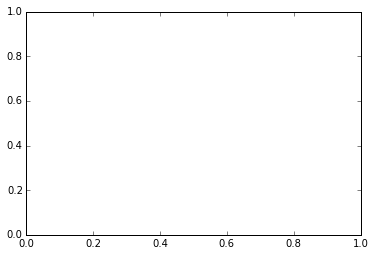

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, precTop10, bar_width,
                 color='b')
plt.xlabel('Stations')
plt.ylabel('Precipitations')
plt.title('10 stations with the highest average precipitation')
plt.xticks(index + bar_width, stationsTop10, rotation=90)
plt.show()

## Relational Table of Snow Data

`Spark SQL` provides a SQL-like interface. It also can be a very powerful tool for performing complex aggregations.

To create a relational table of snow data, you'll use the `Row` class from package `pyspark.sql`. We are using each of the lines from "weatherSnow" `RDD` to create a row object. Each of the row's attributes will be used to access the value of each column; just like you would do to a relational table.

### Stations that contain the keyword 'SNOW'

To filter the weather data to only show stations that contain the keyword 'SNOW', you'll need to reduce the dataset to lines with 'SNOW' in the third column. To do this, use the following commands:

In [33]:
weatherSnow = weatherParse.filter(lambda x: x[2]=="SNOW")
weatherSnow.count()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 16.0 failed 10 times, most recent failure: Lost task 1.9 in stage 16.0 (TID 63, yp-spark-dal09-env5-0046): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 2330, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 2330, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 2330, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 316, in func
    return f(iterator)
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 984, in <lambda>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/usr/local/src/bluemix_ipythonspark_141/spark/python/pyspark/rdd.py", line 984, in <genexpr>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "<ipython-input-33-c8f299585a4e>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRDD$$anon$1.read(PythonRDD.scala:138)
	at org.apache.spark.api.python.PythonRDD$$anon$1.<init>(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:97)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:277)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:244)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:63)
	at org.apache.spark.scheduler.Task.run(Task.scala:70)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:801)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1273)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1264)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1263)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1263)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:730)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:730)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1457)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1418)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)


The following commands are to convert each line of the "weatherSnow" `RDD` into a row object, infer and apply a schema to an `RDD` of row objects, and register a table name "snow2015":

In [ ]:
from pyspark.sql import SQLContext, Row
from datetime import datetime

# instantiate SQLContext object
sqlContext = SQLContext(sc)
# Convert each line of snowWeather RDD into a Row object
snowRows= weatherSnow.map(lambda p: Row(station=p[0], month=datetime.strptime(p[1], '%Y%m%d').month, date=datetime.strptime(p[1], '%Y%m%d').day,metric=p[2], value=int(p[3])))
# Apply Row schema
snowSchema = sqlContext.createDataFrame(snowRows)
# Register 'snow2015' table with 5 columns: station, month, date, metric, and value
snowSchema.registerTempTable("snow2015")
sqlContext.cacheTable("snow2015")

### Comparison of number of snow days between two stations

In this section, you'll determine the number of snow days for each month at stations 'US10chey021' and 'USW00094985'. With that information, you can plot a bar chart to compare the number of snow days on each month at the two stations.

First, find out on how many days it snowed at station "US10chey021" for each month:

In [34]:
snow_US10chey021 = sqlContext.sql("SELECT month, COUNT(*) AS snowdays FROM snow2015 WHERE station='US10chey021' GROUP BY month ORDER BY month").collect()

Py4JJavaError: An error occurred while calling o189.sql.
: org.apache.spark.sql.AnalysisException: no such table snow2015; line 1 pos 40
	at org.apache.spark.sql.catalyst.analysis.package$AnalysisErrorAt.failAnalysis(package.scala:42)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.getTable(Analyzer.scala:225)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$$anonfun$apply$7.applyOrElse(Analyzer.scala:233)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$$anonfun$apply$7.applyOrElse(Analyzer.scala:229)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$3.apply(TreeNode.scala:222)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$3.apply(TreeNode.scala:222)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:51)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:221)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$4.apply(TreeNode.scala:242)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$class.foreach(Iterator.scala:727)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1157)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:48)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:103)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:47)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:273)
	at scala.collection.AbstractIterator.to(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:265)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:252)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1157)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformChildrenDown(TreeNode.scala:272)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:227)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$4.apply(TreeNode.scala:242)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$class.foreach(Iterator.scala:727)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1157)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:48)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:103)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:47)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:273)
	at scala.collection.AbstractIterator.to(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:265)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:252)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1157)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformChildrenDown(TreeNode.scala:272)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:227)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$4.apply(TreeNode.scala:242)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$class.foreach(Iterator.scala:727)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1157)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:48)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:103)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:47)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:273)
	at scala.collection.AbstractIterator.to(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:265)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1157)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:252)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1157)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformChildrenDown(TreeNode.scala:272)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:227)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transform(TreeNode.scala:212)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.apply(Analyzer.scala:229)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.apply(Analyzer.scala:219)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:61)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:59)
	at scala.collection.LinearSeqOptimized$class.foldLeft(LinearSeqOptimized.scala:111)
	at scala.collection.immutable.List.foldLeft(List.scala:84)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1.apply(RuleExecutor.scala:59)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1.apply(RuleExecutor.scala:51)
	at scala.collection.immutable.List.foreach(List.scala:318)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.execute(RuleExecutor.scala:51)
	at org.apache.spark.sql.SQLContext$QueryExecution.analyzed$lzycompute(SQLContext.scala:933)
	at org.apache.spark.sql.SQLContext$QueryExecution.analyzed(SQLContext.scala:933)
	at org.apache.spark.sql.SQLContext$QueryExecution.assertAnalyzed(SQLContext.scala:931)
	at org.apache.spark.sql.DataFrame.<init>(DataFrame.scala:131)
	at org.apache.spark.sql.DataFrame$.apply(DataFrame.scala:51)
	at org.apache.spark.sql.SQLContext.sql(SQLContext.scala:755)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:56)
	at java.lang.reflect.Method.invoke(Method.java:620)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:801)


In [ ]:
US10chey021_snowdays_y=[0] * 12
for row in snow_US10chey021:
    US10chey021_snowdays_y[row.month - 1]=row.snowdays
    
print US10chey021_snowdays_y

Next, find out how many days that it snowed at station "USW00094985" for each month:

In [ ]:
snow_USW00094985 = sqlContext.sql("SELECT  month, COUNT(*) AS snowdays FROM snow2015 WHERE station='USW00094985' GROUP BY month ORDER BY month").collect()

In [ ]:
USW00094985_snowdays_y=[0] * 12
for row in snow_USW00094985:
    USW00094985_snowdays_y[row.month -1]=row.snowdays
    
print USW00094985_snowdays_y

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N=12
ind=np.arange(N)
width = 0.35
pUS10chey021 = plt.bar(ind, US10chey021_snowdays_y, width, color='g', label='US10chey021')
pUSW00094985 = plt.bar(ind+width, USW00094985_snowdays_y, width, color='y', label='USW00094985')

plt.ylabel('SNOW DAYS')
plt.xlabel('MONTH')
plt.title('Snow Days in 2015 at Stations US10chey021 vs. USW00094985')
plt.xticks(ind+width, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.legend()

plt.show()

## Raise Questions:
## Question 1: How many snow days are recorded at each US station?
In this section, you'll determine how many snow days there were at each of the US stations in 2015.

Use the following command to query the "snow2015" table, using `COUNT(*)` function to get the total snow days. The table is sorted by station name and limited to only 100 stations:

In [ ]:
snowStations = sqlContext.sql("SELECT  station, COUNT(*) AS snowdays FROM snow2015 WHERE station LIKE 'US%' GROUP BY station ORDER BY station LIMIT 100")

Print out the first 5 row of "snowStations", including the station name and number of snow days at that station:

In [ ]:
snowStations.head(5)

### Save the query results into a new table

In this step, you will save the query result from the above `SELECT` into a new table called "snowdays_2015". The new table has 2 columns: station (name of station), and snowdays (number of snow days at the station). 

In [ ]:
sqlContext.registerDataFrameAsTable(snowStations, "snowdays_2015")

Print out the first 5 stations that have the most number of snow days in 2015:

In [ ]:
snowStations_new = sqlContext.sql("SELECT station, snowdays FROM snowdays_2015 ORDER BY snowdays DESC LIMIT 5").collect()
for row in snowStations_new:
    print row

## Question 2: Which stations have recorded the same number of snow days in 2015?

In this section, you'll determine list of stations that have the same number of snow days in 2015. First, you will query the table "snowdays_2015" that you created in the previous step. 

By using the `map` function, each row is now transferred into a pair of key/value where the key is the number of snow days and the value is the station name.

Next, the function `reduceByKey` is applied on each pair, where the value of all pairs having the same key will be concatenated together. As a result, we now have a `RDD` which contains the number of snow days and the list of all stations that have the same number of snow days.

The for loop prints out each pair containing the number of snow days and list of stations that have that number of snow days in 2015.

In [ ]:
snowdays_100 = sqlContext.sql("SELECT station, snowdays FROM snowdays_2015")
snowday_stations=snowdays_100.map(lambda x:  (x.snowdays,x.station)).reduceByKey(lambda x, y: x + ',' + y)
for snowday in snowday_stations.collect():
    print 'Snow days:' + str(snowday[0]) + ' Stations:' + str(snowday[1])

## Question 3: For the top 10 station with the most snow days, what is the average minimum temperature during recorded snowfall?
We leave this question open for you to answer it.

## Save DataFrame in Object Storage

In this section, you'll save the DataFrame "snowStations" as files into Object Storage. You'll save the DataFrame "snowStations" which is the query result of table "snow2015" for 100 US stations. Each row contains the name of the station and the number of snow days at that station.

The data will be saved in [Apache Parquet](https://parquet.apache.org/documentation/latest/) file format and regular text file format. Apache Parquet file format saves data in column oriented fashion.

If the Object Storage container name was not defined during the creation of the service instance, then the default container "notebooks" is used. In this case you can run the code below as-is, otherwise use your specified container name.

In [ ]:
# Save as parquet file
snowStations.write.parquet("swift://notebooks.keystone/snowStations.parquet")

After saving the DataFrame, you can see a new data source "snowStations.parquet" in the **Data Source** panel on the **Palette**. The following code shows how to read the parquet file back and register it as a table.

In [ ]:
parquetFile = sqlContext.read.parquet("swift://notebooks.keystone/snowStations.parquet")
parquetFile.registerTempTable("snow_from_parquet")

## You want to know more ?
[Apache Spark 1.4.1 Programming Guide](https://spark.apache.org/docs/1.4.1/programming-guide.html)

[Apache Spark 1.4.1 SQL and DataFrames](https://spark.apache.org/docs/1.4.1/sql-programming-guide.html)

[PySpark 1.4.1 - Python API for Spark](https://spark.apache.org/docs/1.4.1/api/python/)

Please check out our [Learning Center](https://developer.ibm.com/clouddataservices/docs/spark/) for more samples, tutorials, documentation, how-tos and blog posts.